## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [782]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid

In [783]:
customer_data=pd.read_csv('Online Retail.csv',encoding= 'unicode_escape')
customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [784]:
customer_data.shape

(541909, 8)

In [785]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [786]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [787]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [788]:
pd.DataFrame(customer_data.isna().mean())

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


### 25 % of items purchase are not assigned to  Customers
- Hence there is no use of having the data with out customer assignment
- So its better to Delete them from data frame

In [789]:
customer_data.dropna(subset=['CustomerID'],inplace=True)


In [790]:
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- There are no null values in the dataset

## Exploring Countries contribution to statistics in data

In [791]:
country_grouped_data=customer_data.groupby(["InvoiceNo","Country"]).count().reset_index().\
groupby("Country").count()["InvoiceNo"].reset_index().\
rename(columns={"InvoiceNo":"Count"}).sort_values("Count",ascending=False)\
.reset_index().drop('index',axis=1)
country_grouped_data

,Country,Count
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


## total there are 36 countries making purchases

<AxesSubplot:xlabel='Country', ylabel='Count'>

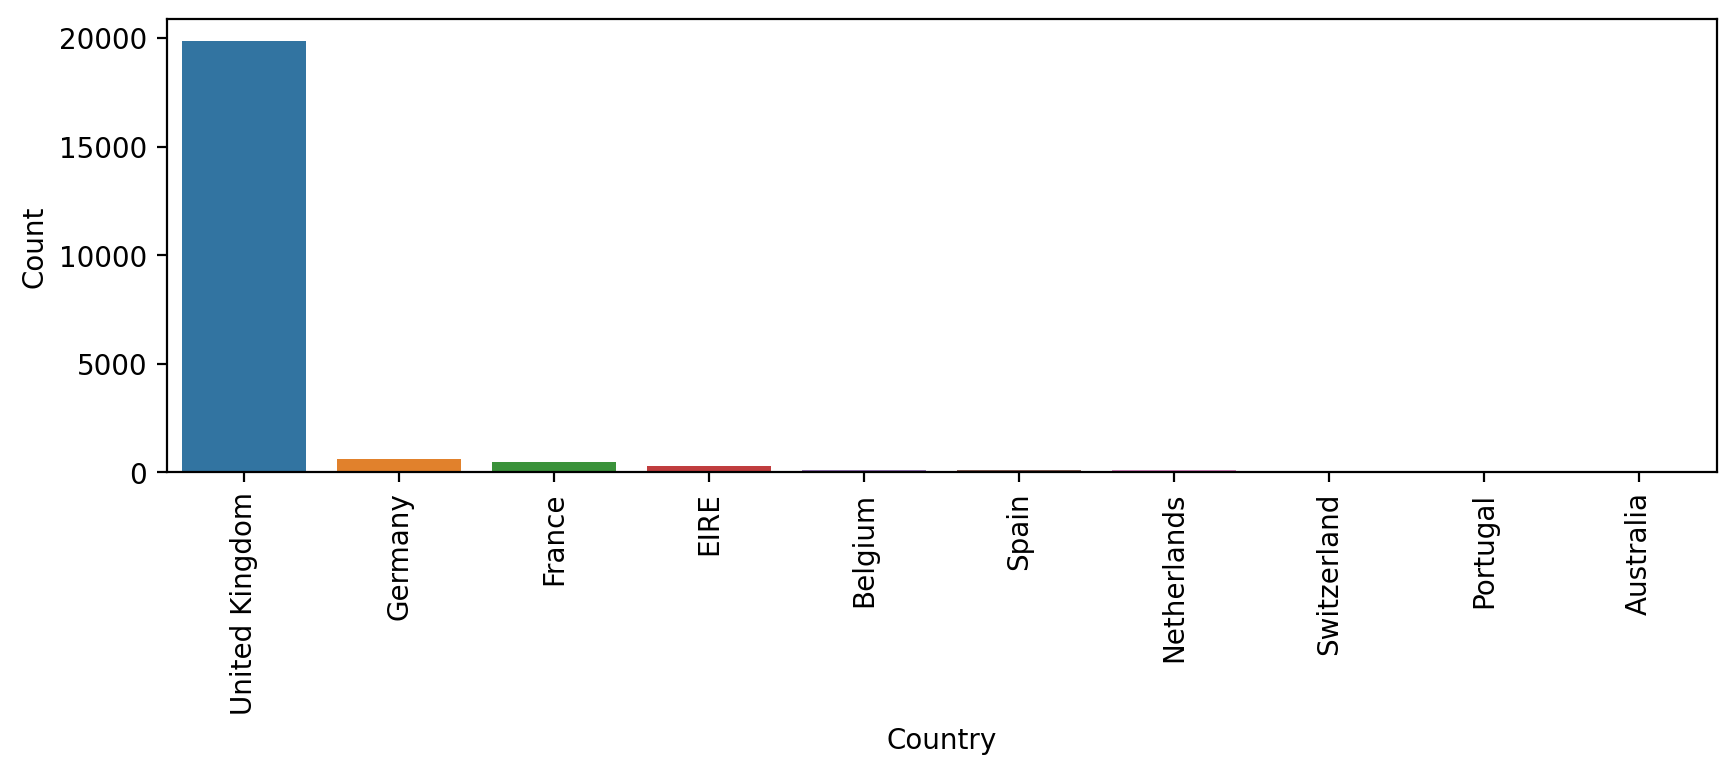

In [792]:
plt.figure(figsize=(10,3),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=country_grouped_data.head(10),x="Country",y="Count")

- United Kingdom is making most of the purchases compared to other countries

<AxesSubplot:xlabel='Country'>

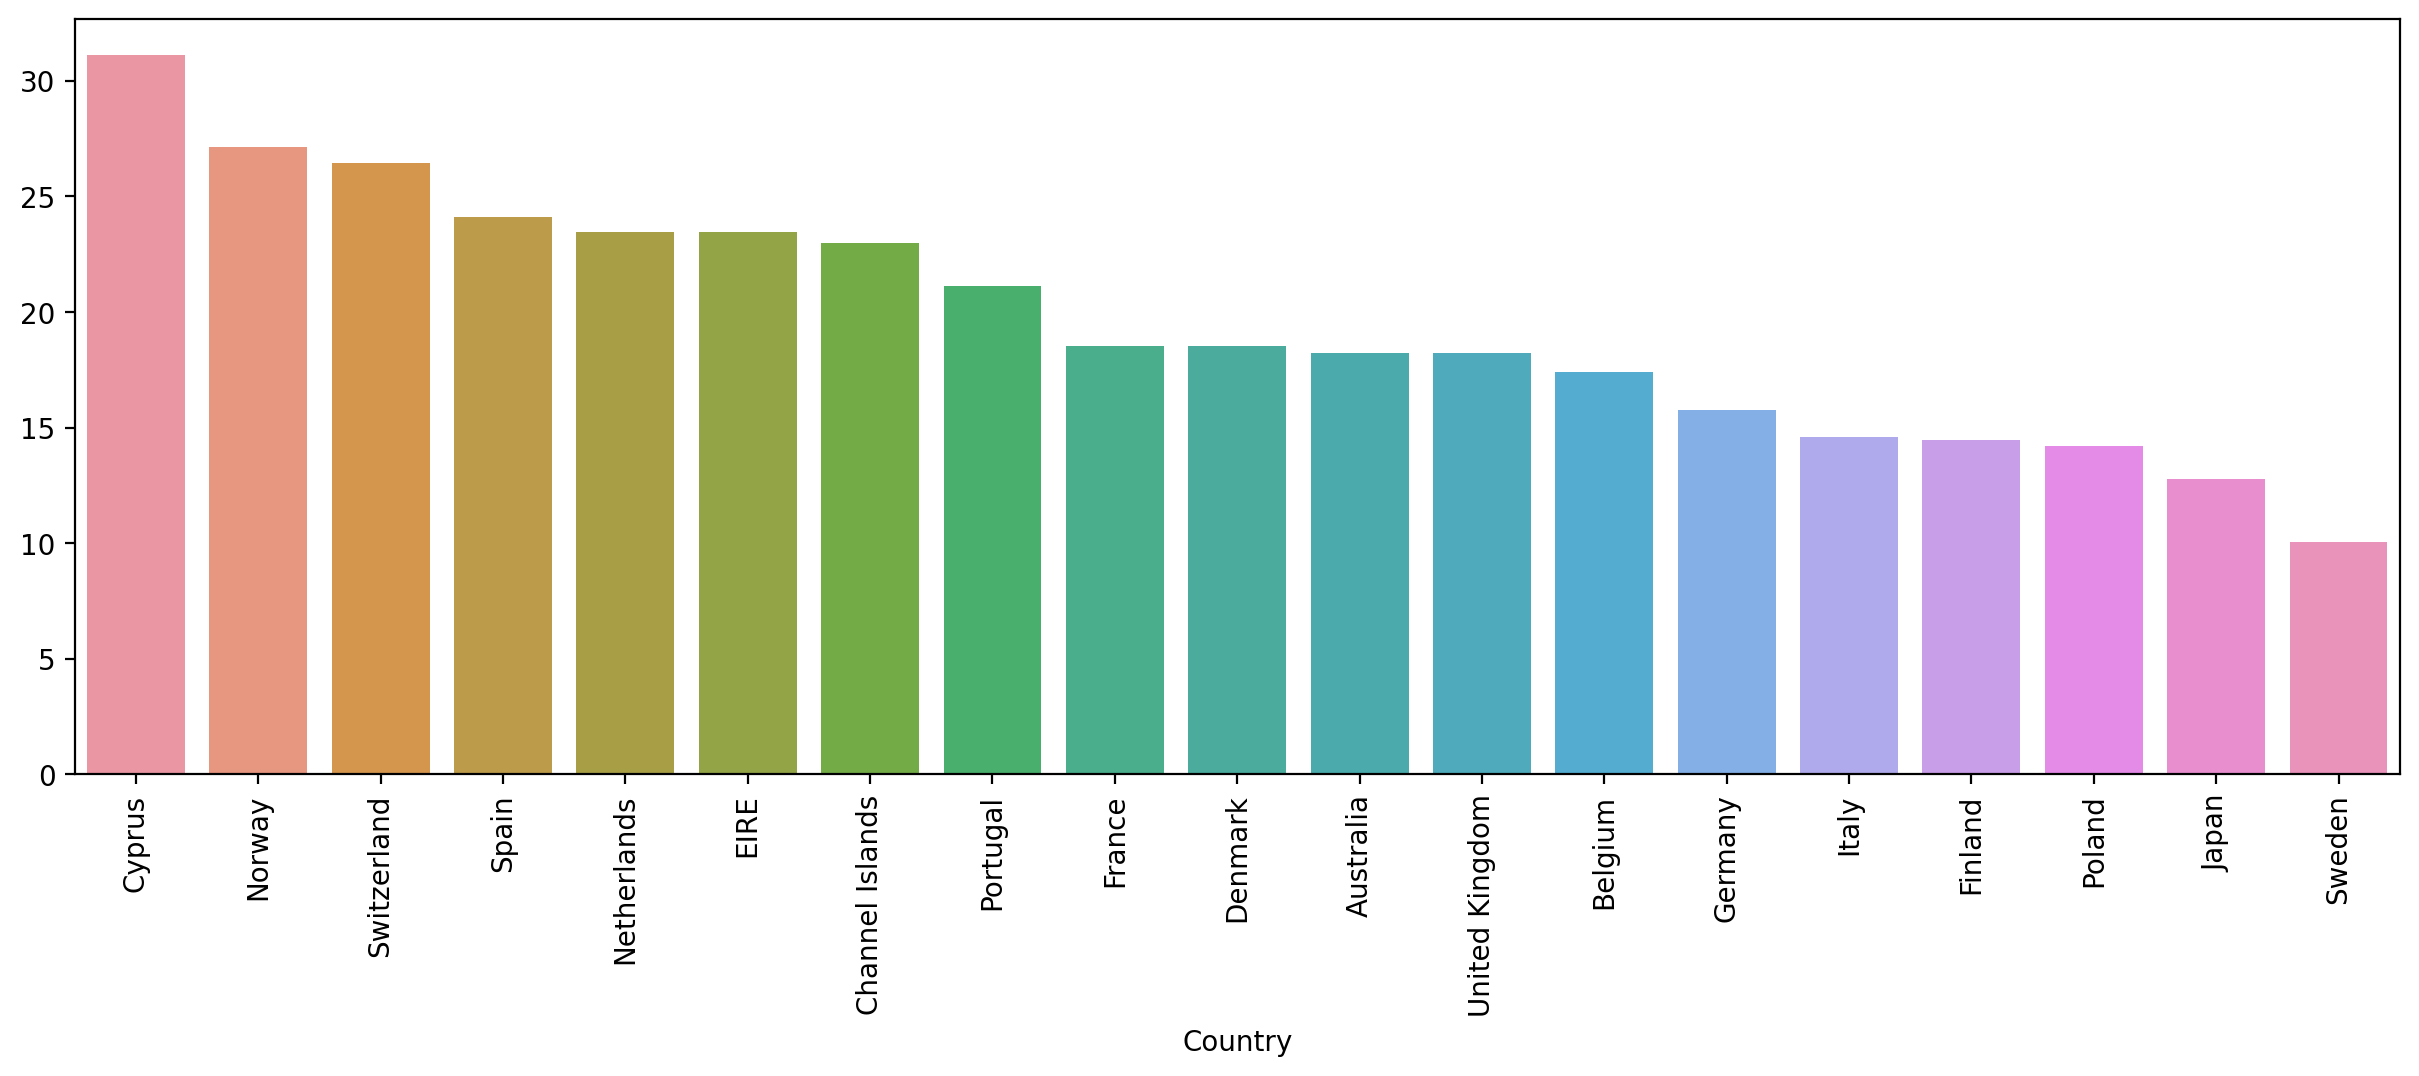

In [793]:
average_items_purchase_country_wise=customer_data.groupby(["InvoiceNo","Country"]).count().groupby("Country").mean()["Quantity"]
country_with20_min_invoices=country_grouped_data[country_grouped_data["Count"]>19].Country.values
average_items_purchase_country_wise=\
    average_items_purchase_country_wise\
    [average_items_purchase_country_wise.index.isin(country_with20_min_invoices)].sort_values(ascending=False)

plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(y=average_items_purchase_country_wise.values,x=average_items_purchase_country_wise.index)

- Above is the bar graph of the average items purchased from countries that are having more than 20 transaction (more than 20 invoices)

# Removing items from uncanceled list that came back for cancellation

In [794]:

cancelled_items=pd.DataFrame()
cancelled_items_=customer_data[customer_data["Quantity"]< 0].sort_values("Quantity")
def find_similar_data(cancel_item):
    cancelled_item_index=cancel_item
    cancel_item=customer_data.loc[cancel_item]
    item_name=cancel_item.Description
    item_stockcode=cancel_item.StockCode
    item_quantity=-1 * cancel_item.Quantity
    item_customer_id=cancel_item.CustomerID
    condition_1=customer_data['StockCode']==item_stockcode
    condition_2=customer_data['Quantity']==item_quantity
    condition_3=customer_data['Description']==item_name
    condition_4=customer_data['CustomerID']==item_customer_id
    df=customer_data[condition_1 & condition_2 & condition_3 & condition_4]
    if df.shape[0]==1:
        df["Canceled_status"]=f"ORDER CANCELED"
    elif df.shape[0]==0:
        df.loc[cancelled_item_index,:]=cancel_item
        df["Canceled_status"]=f"NO PURCHASE RECORD"
    elif df.shape[0]>1:
        df["Canceled_status"]=f"SAME ITEM ALREADY PURCHASED"
    try:
        customer_data.drop([df.index[0],cancelled_item_index],axis=0,inplace=True)
        cancelled_items[df.index[0]]=df.iloc[0,:]
    except:
        None

cancelled_items_.reset_index().rename(columns={'index':"cancelled_index"})["cancelled_index"].apply(lambda x:find_similar_data(x))
cancelled_items.T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled_status
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom,ORDER CANCELED
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom,ORDER CANCELED
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.0,02-12-2010 14:23,0.03,15838.0,United Kingdom,NO PURCHASE RECORD
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,11-01-2011 12:55,2.1,15749.0,United Kingdom,SAME ITEM ALREADY PURCHASED
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,11-01-2011 12:55,1.85,15749.0,United Kingdom,SAME ITEM ALREADY PURCHASED
...,...,...,...,...,...,...,...,...,...
349851,C567536,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1.0,21-09-2011 09:52,7.95,14284.0,United Kingdom,NO PURCHASE RECORD
349871,C567540,23173,REGENCY TEAPOT ROSES,-1.0,21-09-2011 10:00,9.95,12384.0,Switzerland,NO PURCHASE RECORD
176843,C552029,20982,12 PENCILS TALL TUBE SKULLS,-1.0,05-05-2011 18:11,0.85,15622.0,United Kingdom,NO PURCHASE RECORD
176839,C552029,22681,FRENCH BLUE METAL DOOR SIGN 6,-1.0,05-05-2011 18:11,1.25,15622.0,United Kingdom,NO PURCHASE RECORD


18371 4388 1455


NO PURCHASE RECORD             5544
ORDER CANCELED                 2034
SAME ITEM ALREADY PURCHASED    1075
MANUAL                          175
DISCOUNT                         77
Name: Canceled_status, dtype: int64

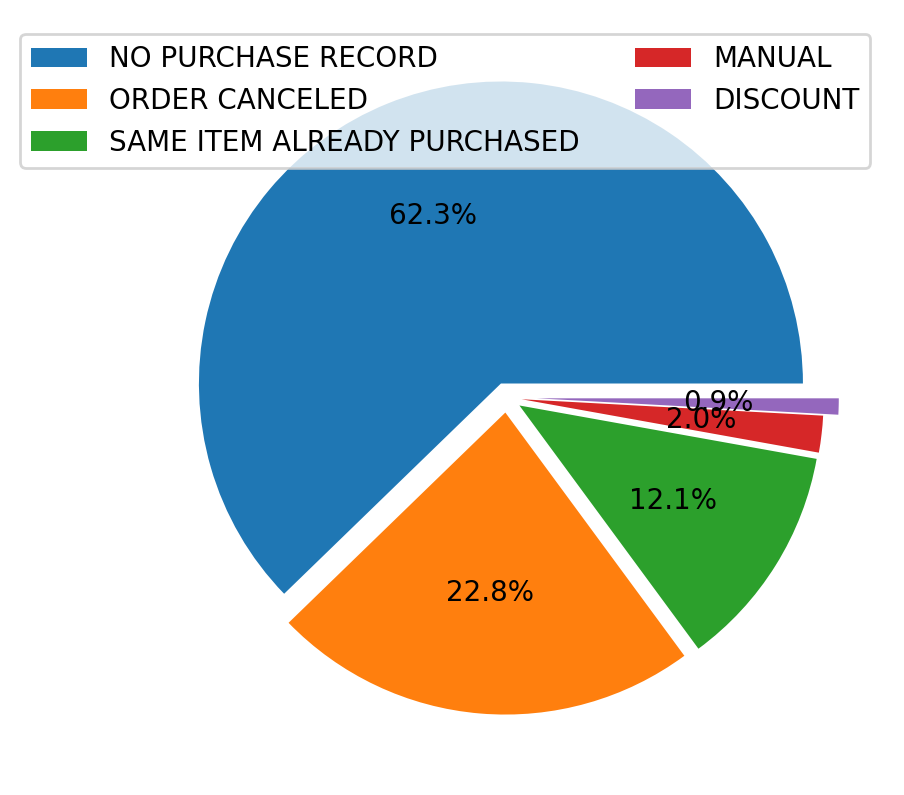

In [903]:
cancelled_items_1=cancelled_items.T
a=set(customer_data["InvoiceNo"].unique())
b=set(cancelled_items_1['InvoiceNo'].unique())
c=a.intersection(b)
print(len(a),len(b),len(c))
cancelled_items_1.loc[cancelled_items_1["StockCode"]=="D","Canceled_status"]="DISCOUNT"
cancelled_items_1.loc[cancelled_items_1["StockCode"]=="M","Canceled_status"]="MANUAL"
canceled_invoice_reason=cancelled_items_1["Canceled_status"].value_counts()
plt.figure(figsize=(5,5),dpi=200)
plt.pie(canceled_invoice_reason,
        explode = [0.05,0.05,0.05,0.05,0.1],
        autopct='%.1f%%')
plt.legend(labels = canceled_invoice_reason.index,ncol=2)
plt.show()
display(canceled_invoice_reason)

## Total there are 8905 items having invoice status as canceled
- Out of 8905 of canceled invoices
 1. 22 % i.e 2060 items is been canceled
 2. 12 % i.e 1103 items is been canceled and **ordered again**
 3. 62 % i.e 5742 items is been canceled but they have **no similar purchase record**
 4. 2 % i.e 175 are manual
 4. 0.9 % i.e 77 are discounts given 

In [870]:
print(f' There are {len(customer_data["CustomerID"].unique())} Customer')
print(f' There are {len(customer_data["Description"].unique())} Items')
print(f' There are {len(customer_data["InvoiceNo"].unique())} Transactions')


 There are 4326 Customer
 There are 3862 Items
 There are 18371 Transactions


In [942]:
stock_code_not_sold=set(cancelled_items_1["StockCode"].unique())-set(customer_data["StockCode"].unique())
# stock_code_not_sold.remove("Discount")
items_never_purchased=cancelled_items_1[cancelled_items_1["StockCode"].isin(stock_code_not_sold)].groupby("Description")["Quantity"].sum()
items_never_purchased=items_never_purchased.drop(["CRUK Commission","Discount"]).reset_index().rename(columns={"StockCode":"Stock Cancelled"})
items_never_purchased[["Description"]]

,Description
0,2 DAISIES HAIR COMB
1,ANTIQUE LILY FAIRY LIGHTS
2,ASSORTED TUTTI FRUTTI ROUND BOX
3,BLACK 3 BEAD DROP EARRINGS
4,BLUE FLYING SINGING CANARY
5,BLUE PADDED SOFT MOBILE
6,CLASSIC DIAMANTE EARRINGS JET
7,CREAM SWEETHEART MAGAZINE RACK
8,CREAM SWEETHEART SHELF + HOOKS
9,CREAM SWEETHEART TRAYS


## Above are list of the items in the given data that are never made a revenue (zero sales)  
- Because came back due to cancellation 

In [906]:

print(f"{np.round(100*(22190-18371)/22190,2)} % of transactions is cancelled")
print(f"{np.round(100*(4372 -4326 )/4372 ,2)} % of customers purchased nothing and have no transaction due to order cancellation")
print(f"{np.round(100*(3896 -3862)/3896 ,2)} % of items in the data given is never purchased due to order cancellation ")


17.21 % of transactions is cancelled
1.05 % of customers purchased nothing and have no transaction due to order cancellation
0.87 % of items in the data given is never purchased due to order cancellation 


1. 17% of transaction has been deleted
2. 1.05% of customers have no transaction due to canceled orders
3. 0.87% of items in the given data are never purchased

## After removing the canceled items from the data that came back for cancellation 


In [486]:
# uncancelled_items=customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]
top_sold_out_items=customer_data.groupby("Description").sum()["Quantity"].reset_index()\
.groupby("Description").sum().sort_values(by="Quantity",ascending=False).reset_index()
# top_sold_out_items
customer_data.groupby(["Description","CustomerID"]).count().reset_index().groupby("Description")["CustomerID"]\
.count().sort_values(ascending=False)
# top_sold_out_items.head(30)

Description
REGENCY CAKESTAND 3 TIER               872
WHITE HANGING HEART T-LIGHT HOLDER     854
PARTY BUNTING                          708
ASSORTED COLOUR BIRD ORNAMENT          677
SET OF 3 CAKE TINS PANTRY DESIGN       635
                                      ... 
KNITTED RABBIT DOLL                      1
BLACK VINT ART DEC CRYSTAL BRACELET      1
SET 36 COLOURING PENCILS DOILEY          1
SET/5 RED SPOTTY LID GLASS BOWLS         1
CAKE STAND LACE WHITE                    1
Name: CustomerID, Length: 3862, dtype: int64

<AxesSubplot:xlabel='Quantity', ylabel='Description'>

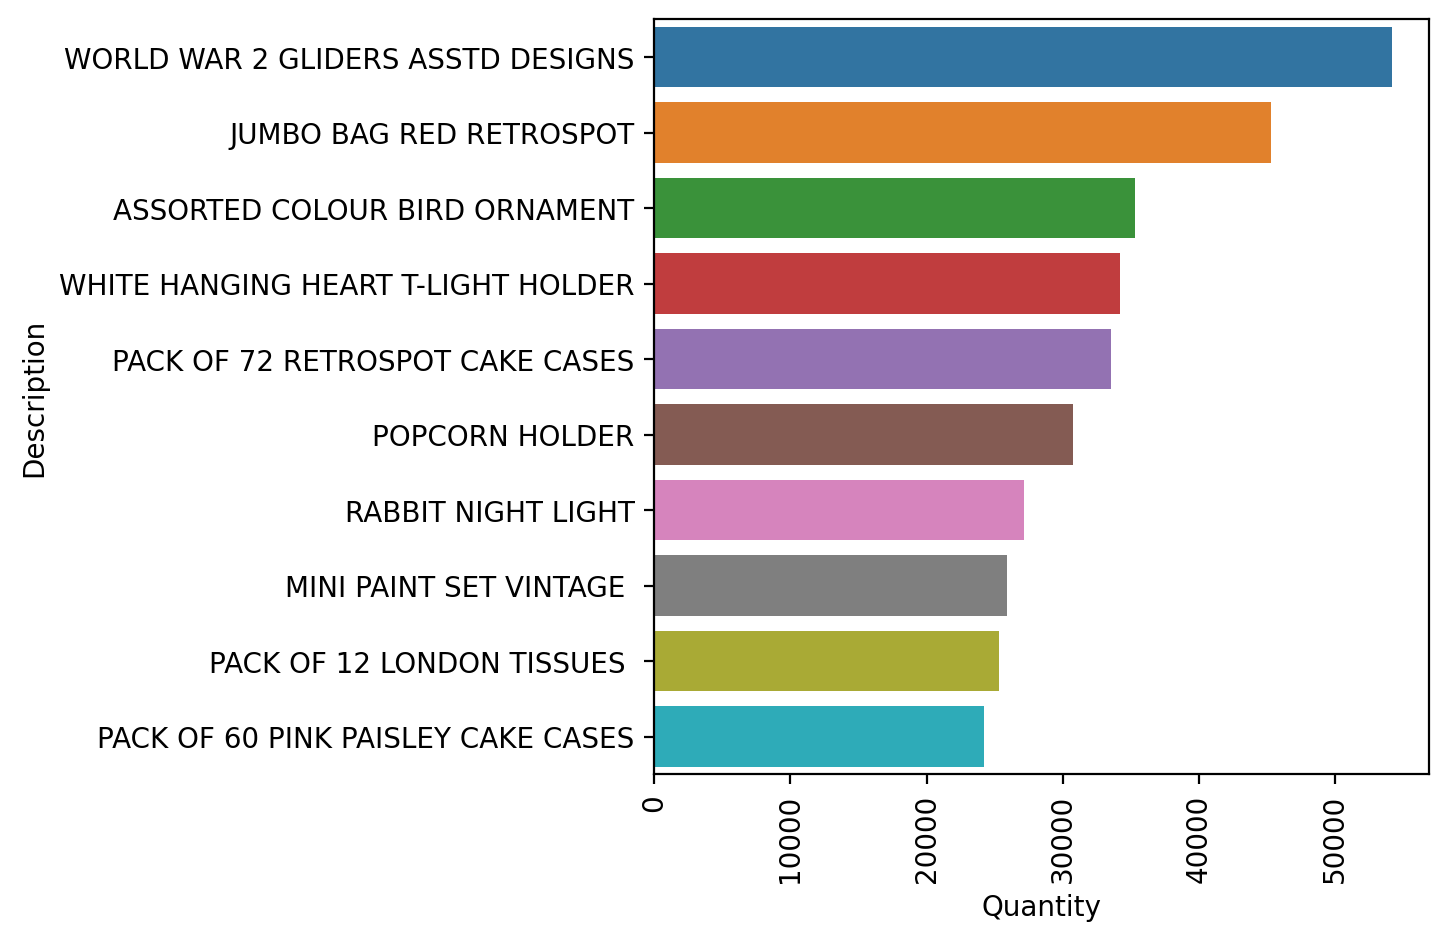

In [450]:
plt.figure(figsize=(5,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=top_sold_out_items.head(10),x="Quantity",y="Description")

- Top 10 items purchased quantity wise

<AxesSubplot:xlabel='UnitPrice'>

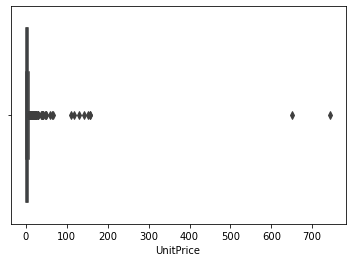

In [492]:
sns.boxplot(customer_data.groupby("Description")["UnitPrice"].mean())

- from this box plot we can see that most of the items prices are below 200 pound sterling

In [254]:
customer_data["Total_Cost"]=customer_data["Quantity"]*customer_data["UnitPrice"]


,Description,Total_Cost
0,REGENCY CAKESTAND 3 TIER,138005.80
1,WHITE HANGING HEART T-LIGHT HOLDER,93974.35
2,JUMBO BAG RED RETROSPOT,83702.64
3,POSTAGE,68429.26
4,PARTY BUNTING,68014.53
5,ASSORTED COLOUR BIRD ORNAMENT,56531.33
6,RABBIT NIGHT LIGHT,51283.80
7,CHILLI LIGHTS,45951.76
8,PAPER CHAIN KIT 50'S CHRISTMAS,41722.18
9,Manual,40154.36


<AxesSubplot:xlabel='Total_Cost', ylabel='Description'>

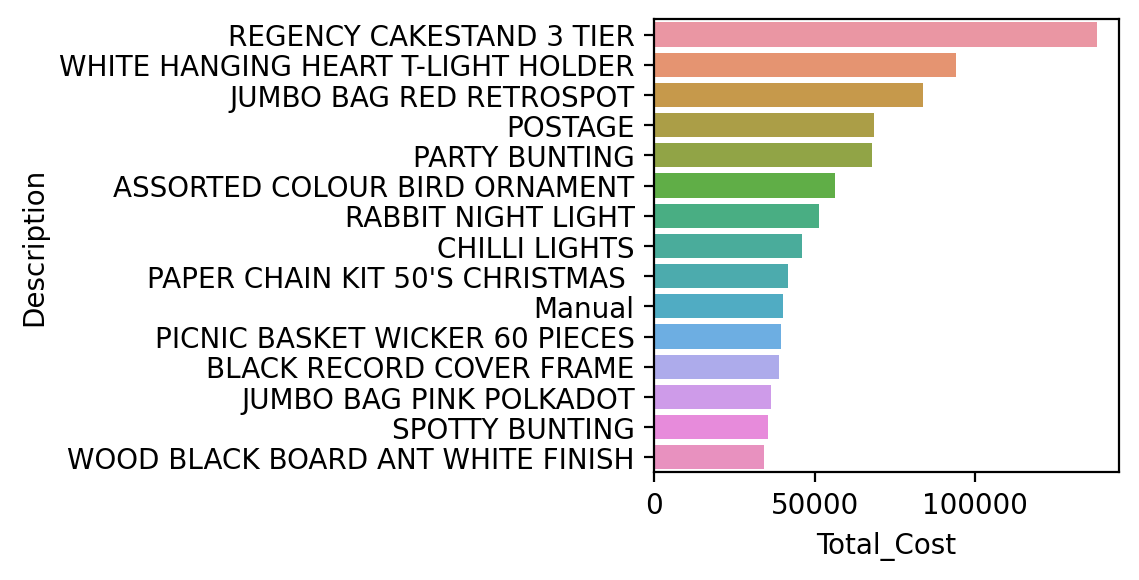

In [463]:
top_items_made_profit=customer_data.groupby("Description")["Total_Cost"].sum().sort_values(ascending=False).reset_index()
display(top_items_made_profit.head(15))
plt.figure(figsize=(3,3),dpi=200)
sns.barplot(data=top_15_items_made_profit.head(15),y="Description",x="Total_Cost")

<AxesSubplot:xlabel='Quantity'>

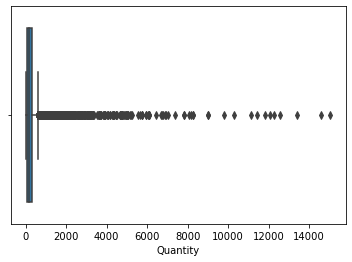

In [499]:
sns.boxplot(customer_data.groupby("InvoiceNo").sum()['Quantity'])

In [150]:
uncancelled_items=customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]
customer_data[customer_data["Description"]=='ROTATING SILVER ANGELS T-LIGHT HLDR'].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,02-12-2010 14:23,0.03,15838.0,United Kingdom,-280.80
44303,C540164,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-6,05-01-2011 12:02,2.55,14911.0,EIRE,-15.30
414618,C572473,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1,24-10-2011 13:34,2.55,18188.0,United Kingdom,-2.55
412073,572278,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,23-10-2011 10:46,2.55,16326.0,United Kingdom,2.55
361546,568346,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,26-09-2011 15:28,4.96,14096.0,United Kingdom,4.96
...,...,...,...,...,...,...,...,...,...
4479,536784,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240,02-12-2010 15:20,1.88,15061.0,United Kingdom,451.20
23254,538191,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240,10-12-2010 10:49,1.88,15061.0,United Kingdom,451.20
31595,538998,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,480,15-12-2010 12:08,1.88,15061.0,United Kingdom,902.40
413848,572325,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,600,24-10-2011 09:54,1.74,14607.0,United Kingdom,1044.00


In [515]:
customer_invoice_quantity_=customer_data.groupby(["CustomerID","InvoiceNo"],as_index=False)["Quantity"].count().sort_values(by="CustomerID")
customer_invoice_quantity_

,CustomerID,InvoiceNo,Quantity
0,12347.0,537626,31
1,12347.0,542237,29
2,12347.0,549222,24
3,12347.0,556201,18
4,12347.0,562032,22
...,...,...,...
18378,18283.0,541854,45
18384,18283.0,560025,56
18394,18287.0,570715,38
18393,18287.0,554065,29


- From the above list we can differentiate transactions by
1. Less product purchases in an invoice (1 - 4 products)
2. More product purchases in an invoice (more than 50 products)
3. Average number of product purchases

In [520]:
customer_invoice_quantity_.describe()

,CustomerID,Quantity
count,18396.000000,18396.000000
mean,15267.299685,21.464775
std,1733.963238,24.892746
min,12347.000000,1.000000
25%,13777.000000,7.000000
50%,15174.500000,15.000000
75%,16779.000000,27.000000
max,18287.000000,542.000000


In [527]:
customers_invoice_less_items=customer_invoice_quantity_[customer_invoice_quantity_["Quantity"]<5]
display(customers_invoice_less_items)
percentage_less_item_transaction=customers_invoice_less_items.shape[0]/customer_invoice_quantity_.shape[0]*100
print(f'{np.round(percentage_less_item_transaction,2)}% of transaction are happened with less number of items purchase below 5 products')

,CustomerID,InvoiceNo,Quantity
10,12348.0,568172,3
15,12352.0,545332,2
14,12352.0,545323,4
16,12352.0,546869,1
21,12353.0,553900,4
...,...,...,...
18368,18273.0,565480,1
18369,18273.0,581136,1
18389,18283.0,575675,1
18385,18283.0,560032,1


18.06% of transaction are happened with less number of items purchase below 5 products


- There are around approx 3320 out of 18400 transactions customers have made just to purchase less than 5 product

In [533]:
customers_invoice_more_items=customer_invoice_quantity_[customer_invoice_quantity_["Quantity"]>50]
display(customers_invoice_more_items)
percentage_more_item_transaction=customers_invoice_more_items.shape[0]/customer_invoice_quantity_.shape[0]*100
print(f'{np.round(percentage_more_item_transaction,2)}% of transaction are happened with more number of items purchase above 50 products')

,CustomerID,InvoiceNo,Quantity
11,12349.0,577609,73
22,12354.0,550911,58
27,12357.0,574740,131
33,12359.0,571034,105
31,12359.0,543370,79
...,...,...,...
18388,18283.0,575668,59
18377,18283.0,540350,57
18383,18283.0,557956,87
18380,18283.0,550957,56


8.89% of transaction are happened with more number of items purchase above 50 products


- 1600 transaction out of 18000 transactions approx 8 % of transaction has happened with maximum purchases more than 50 products

<AxesSubplot:ylabel='Frequency'>

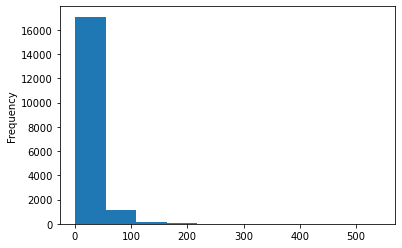

In [580]:
customer_invoice_quantity_["Quantity"].plot.hist()

In [ ]:
customer_invoice_quantity_[customer_invoice_quantity_["Segment"]==0].describe()

In [192]:
top_10_revenue_from_items.sort_values("Total_Cost",ascending=False)

,Quantity,UnitPrice,CustomerID,Total_Cost,Customer_Count,Average
Description,,,,,,
REGENCY CAKESTAND 3 TIER,11555,23678.05,28473438.0,132870.40,1905,69.748241
WHITE HANGING HEART T-LIGHT HOLDER,34147,5985.12,32213017.0,93823.85,2070,45.325531
JUMBO BAG RED RETROSPOT,45066,3345.70,25396253.0,83236.76,1662,50.082286
PARTY BUNTING,15027,6897.06,21766527.0,67687.53,1416,47.801928
POSTAGE,3002,45314.68,15425584.0,66710.24,1196,55.777793
...,...,...,...,...,...,...
WHITE CHERRY LIGHTS,-8,6.75,15831.0,-54.00,1,-54.000000
CHALKBOARD KITCHEN ORGANISER,-4,118.75,76808.0,-87.80,5,-17.560000
Discount,-1194,5581.31,1149366.0,-5696.22,77,-73.976883


In [189]:
customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60
